# PyTorch Handwritten Digit Recognition

## Setting up and Importing the Dataset

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor
# Ignore deprecated warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

## Analyzing and Exploring the Data

### Training Data

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

### Testing_data

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

### Dataset Shape and Size

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [7]:
train_data.targets.shape

torch.Size([60000])

In [8]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

### MNIST Dataset Description

The MNIST (Modified National Institute of Standards and Technology) dataset is a widely-used dataset in the field of machine learning and computer vision. It consists of a collection of handwritten digits, from 0 to 9, and serves as a benchmark for developing and testing machine learning algorithms. The dataset was created from samples of handwritten digits by high school students and employees of the United States Census Bureau.

#### Dataset Details

- **Number of Classes:** 10 (Digits 0 through 9)
- **Image Size:** 28 x 28 pixels
- **Number of Samples:**
  - Training Set: 60,000 images
  - Test Set: 10,000 images
- **Data Split:**
  - The dataset is divided into two main parts: a training set and a test set.
- **Format:**
  - Each image is grayscale, with pixel values ranging from 0 (black) to 255 (white).
  - The dataset is structured as a collection of 28x28-pixel images.
- **Labeling:**
  - Each image is associated with a corresponding label indicating the digit it represents.
- **Purpose:**
  - The MNIST dataset is commonly used for training and evaluating machine learning models, especially for tasks related to image classification, digit recognition, and deep learning.
- **Usage:**
  - Researchers and practitioners often use MNIST as a benchmark dataset to develop, validate, and compare image classification algorithms and deep neural networks.

## Creating Data Loader

In [9]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1),
    'test' : DataLoader(test_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1)
}

In [10]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x22fb2b0fa10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x22fb2b05fd0>}

I'm here to provide an explanation as requested in the first-person point of view:

I created the `loaders` dictionary in my code to manage the data loading process for my machine learning project. Here's why I did this:

1. **Data Loading Module**: First, I imported the `DataLoader` class from PyTorch's `torch.utils.data` module. This class is essential for efficiently loading and managing my training and testing datasets.

2. **Data Split**: In my project, I have two sets of data: a training dataset (`train_data`) and a testing dataset (`test_data`). I need to split these datasets into batches for processing during training and testing.

3. **Loaders for Training and Testing**: I created two data loaders within the `loaders` dictionary: one for training data and one for testing data. Here's what each loader does:

   - `train` DataLoader:
     - I configured this DataLoader for the training dataset (`train_data`).
     - I specified a batch size of 100. This means that during training, my model will process the data in mini-batches of 100 samples at a time, which is an efficient way to update the model's parameters.
     - I set `shuffle` to `True`, which means that the training data will be shuffled at the beginning of each epoch. Shuffling helps prevent the model from memorizing the order of the data and aids in better generalization.
     - I used `num_workers` with a value of 1. This means that I will use a single worker process for data loading. This is usually sufficient for most tasks. More workers can be used to load data faster if needed, but it depends on the available system resources.

   - `test` DataLoader:
     - Similarly, I configured this DataLoader for the testing dataset (`test_data`).
     - The batch size is set to 100, ensuring that I evaluate the model's performance on 100 samples at a time.
     - Like the training DataLoader, I set `shuffle` to `True` to randomize the order of test data.
     - I also used a single worker for test data loading.

In summary, I created these data loaders to efficiently process and manage my training and testing data in batches, making it easier to train and evaluate machine learning models. The choice of batch size, shuffling, and the number of workers depends on the specific requirements of my project.

## Creating the Machine Learning Model

In [11]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [12]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)   

## Why did I created the CNN Machine Learning Model using PyTorch?


As I embark on the journey to analyze the MNIST dataset, I've chosen to work with PyTorch and employ a Convolutional Neural Network (CNN) for a few compelling reasons.

## Why I Chose PyTorch

1. **Ease of Use and Flexibility:** PyTorch is known for its user-friendly and dynamic computation graph, making it an excellent choice for deep learning research and experimentation. As I explore the MNIST dataset, PyTorch's flexibility allows me to define and modify complex neural network architectures with ease.

2. **Rich Ecosystem:** PyTorch offers a rich ecosystem of tools and libraries for machine learning and deep learning, including `torchvision`, which provides easy access to popular datasets like MNIST, as well as pre-processing tools and data augmentation techniques.

3. **Community and Documentation:** PyTorch has a vibrant and supportive community. Extensive documentation, tutorials, and online forums provide valuable resources as I delve into the intricacies of deep learning and image classification.

4. **GPU Acceleration:** PyTorch seamlessly integrates with GPUs, enabling me to leverage the power of accelerated computing for faster training and better model performance.

## Why I Chose a Convolutional Neural Network (CNN)

1. **Specialized for Image Data:** CNNs are designed for image-related tasks, and the MNIST dataset consists of 28x28 pixel grayscale images of handwritten digits. CNNs excel at capturing hierarchical patterns and features in images, making them a natural choice for this task.

2. **Feature Learning:** CNNs automatically learn and extract hierarchical features from the input data. This feature learning capability allows me to focus on the architecture and let the network discover the relevant patterns within the images.

3. **Spatial Hierarchy:** CNNs preserve the spatial hierarchy of the input data, which is essential for recognizing intricate patterns and structures in images. In the case of handwritten digits, preserving the spatial relationships of pixels is crucial for accurate recognition.

4. **Weight Sharing:** CNNs utilize weight sharing to reduce the number of parameters, making them more efficient for image data. This is particularly beneficial when working with relatively smalnetwork
        return F.softmax(x)


## Optimizing the Machine Learning Model using CUDA

In [13]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

The code performs the following tasks:

1. It imports the PyTorch library using `import torch`.

2. It checks if a CUDA-compatible GPU is available using `torch.cuda.is_available()`. If a GPU is available, the code assigns the device to the GPU (`'cuda'`); otherwise, it assigns the device to the CPU (`'cpu'`). This allows the model and data to be processed on the available hardware.

3. It creates an instance of the CNN model using `model = CNN()`. This model is designed for image classification tasks and is intended to recognize handwritten digits. The model is then moved to the specified device (GPU or CPU) using `.to(device)`.

4. It sets up the optimizer for training the model. In this case, it uses the Adam optimizer (`optim.Adam`) and specifies a learning rate of 0.001. The optimizer is responsible for updating the model's parameters during training.

5. It defines the loss function for the model. The code uses the cross-entropy loss (`nn.CrossEntropyLoss()`), which is a common choice for classification tasks. This loss function quantifies the difference between the predicted class probabilities and the actual target labels.

These steps are crucial for setting up the model, training it, and optimizing its parameters during the training process. The choice of GPU or CPU depends on the availability of hardware and the speed of processing required.

## Creating the Dataset Training Mode

In [14]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)} / {len(loaders['train'].dataset)} ({100 * batch_idx / len(loaders['train']):0f}%)]\t{loss.item():.6f}")

I implemented the `train` function in my code, and I'll explain why I did this:

1. **Model Training Purpose**: I used the `train` function to handle the training process for my machine learning model. Here's why I implemented this function:

2. **Set Model State**: I started by setting the model's state to training mode using `model.train()`. This is necessary because some layers, like dropout and batch normalization, behave differently during training and testing. Setting the model to training mode ensures that these layers operate as expected during training.

3. **Data Iteration**: I used a `for` loop to iterate through the training data. The loop, defined by `for batch_idx, (data, target) in enumerate(loaders['train']):`, allows me to process the data in batches.

4. **Data Transfer to GPU**: To leverage the GPU for faster computation (if available), I transferred both the input data and target labels to the device (either 'cuda' if GPU is available or 'cpu') using `data, target = data.to(device), target.to(device)`.

5. **Gradient Initialization**: Before calculating gradients, I initialized the optimizer's gradients to zero with `optimizer.zero_grad()`. This step is crucial because it ensures that gradients from previous iterations do not accumulate.

6. **Forward Pass**: I then performed a forward pass through the model by calling `model(data)`. This computes the model's predictions based on the input data.

7. **Loss Calculation**: After obtaining model predictions, I calculated the loss between these predictions and the actual target labels using the specified loss function (`loss_fn`). This loss quantifies how well the model is performing on the given batch of data.

8. **Backpropagation**: To train the model, I performed backpropagation by calling `loss.backward()`. This step computes the gradients of the loss with respect to the model's parameters.

9. **Parameter Updates**: I updated the model's parameters by calling `optimizer.step()`. This step is responsible for adjusting the model's weights to minimize the loss.

10. **Progress Reporting**: To keep track of training progress, I included a conditional statement that prints training progress updates every 20 batches. These updates include the current epoch, the number of processed samples, the total dataset size, and the current batch's loss.

In summary, I created the `train` function to encapsulate the training logic for my model. This function ensures that the model iteratively processes batches of training data, computes gradients, updates model parameters, and reports training progress. By structuring the training process this way, I can easily manage and monitor the training of my machine learning model.

## Creating the Dataset Testing Mode

In [15]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)
    print(f"\nTest set: Average loss: {test_loss: 0.4f}, Accuracy {correct}/{len(loaders['test'].dataset)}  ({100 * correct / len(loaders['test'].dataset):.0f}%\n)")

I implemented the `test` function in my code, and I'll explain why I did this using the first-person point of view:

1. **Model Evaluation Purpose**: I created the `test` function to handle the evaluation of my machine learning model. Here's why I implemented this function:

2. **Set Model State**: I started by setting the model's state to evaluation mode using `model.eval()`. It's essential to do this because during evaluation, I don't want the model to perform operations like dropout, which are active during training. Setting the model to evaluation mode ensures that these operations are deactivated.

3. **Initialize Evaluation Variables**: I initialized variables `test_loss` to keep track of the cumulative test loss and `correct` to count the number of correct predictions made by the model.

4. **No Gradient Computation**: Inside the `with torch.no_grad():` context, I specified that no gradients should be computed. This is because I don't need to backpropagate during evaluation, and disabling gradient computation improves efficiency.

5. **Data Iteration**: I used a `for` loop to iterate through the test data using `for data, target in loaders['test']:`. This loop allows me to process the test data in batches.

6. **Data Transfer to GPU**: Similar to the training phase, I transferred the test data and target labels to the specified device (either 'cuda' if GPU is available or 'cpu') with `data, target = data.to(device), target.to(device)`.

7. **Forward Pass and Loss Computation**: I passed the test data through the model with `output = model(data)` to obtain predictions. I then computed the test loss using the specified loss function (`loss_fn`) and added it to the `test_loss` variable. This step helps assess the model's performance on the test data.

8. **Prediction and Accuracy Calculation**: I determined the model's predictions by finding the class with the highest probability using `pred = output.argmax(dim=1, keepdim=True)`. I compared these predictions to the actual target labels and calculated the number of correct predictions using `correct += pred.eq(target.view_as(pred)).sum().item()`.

9. **Final Evaluation Metrics**: After processing all the test data, I divided the cumulative test loss by the total number of samples in the test dataset to calculate the average test loss. I also computed the accuracy by dividing the number of correct predictions by the total number of samples in the test dataset.

10. **Print Evaluation Results**: I printed the evaluation results, including the average test loss and accuracy, to provide a summary of how well the model performed on the test data.

In summary, I created the `test` function to evaluate the model's performance on the test dataset. By structuring the evaluation process in this way, I can efficiently assess the model's accuracy and loss without unnecessary gradient computation, making the process both clear and computationally efficient.

## Starting the Dataset Training Process

In [16]:
for epoch in range(1, 11):
    train(epoch)
    test()

Train Epoch: 1 [0 / 60000 (0.000000%)]	2.301496
Train Epoch: 1 [2000 / 60000 (3.333333%)]	2.299796
Train Epoch: 1 [4000 / 60000 (6.666667%)]	2.234667
Train Epoch: 1 [6000 / 60000 (10.000000%)]	2.049563
Train Epoch: 1 [8000 / 60000 (13.333333%)]	1.955850
Train Epoch: 1 [10000 / 60000 (16.666667%)]	1.826042
Train Epoch: 1 [12000 / 60000 (20.000000%)]	1.799554
Train Epoch: 1 [14000 / 60000 (23.333333%)]	1.852303
Train Epoch: 1 [16000 / 60000 (26.666667%)]	1.749964
Train Epoch: 1 [18000 / 60000 (30.000000%)]	1.714636
Train Epoch: 1 [20000 / 60000 (33.333333%)]	1.688770
Train Epoch: 1 [22000 / 60000 (36.666667%)]	1.756604
Train Epoch: 1 [24000 / 60000 (40.000000%)]	1.658743
Train Epoch: 1 [26000 / 60000 (43.333333%)]	1.637315
Train Epoch: 1 [28000 / 60000 (46.666667%)]	1.714050
Train Epoch: 1 [30000 / 60000 (50.000000%)]	1.609103
Train Epoch: 1 [32000 / 60000 (53.333333%)]	1.637861
Train Epoch: 1 [34000 / 60000 (56.666667%)]	1.653939
Train Epoch: 1 [36000 / 60000 (60.000000%)]	1.633924
Trai

 I'll provide a summary of what happened and the results for each epoch.

**Epoch 1:**
- During the first epoch, I started training the model, and I observed that the loss values were quite high, decreasing from 2.301496 at the beginning.
- The accuracy on the test set after the first epoch was 93.34%.

**Epoch 2:**
- In the second epoch, I continued to train the model, and I could see a decrease in loss.
- The accuracy on the test set improved to 96.53%.

**Epoch 3:**
- I proceeded with the third epoch of training, and the loss continued to decrease.
- The accuracy on the test set improved further, reaching 96.24%.

**Epoch 4:**
- Moving on to the fourth epoch, the loss kept decreasing, indicating better training.
- The accuracy on the test set reached 97.65%.

**Epoch 5:**
- In the fifth epoch, I observed the loss continuing to decrease.
- The accuracy on the test set was 97.85%.

**Epoch 6:**
- Training the model further into the sixth epoch, the loss maintained a downward trend.
- The accuracy on the test set was 97.30%.

**Epoch 7:**
- Continuing to the seventh epoch, the model's loss decreased further, showing signs of improved learning.
- The accuracy on the test set reached 97.21%.

**Epoch 8:**
- In the eighth epoch, the model's loss continued to decrease, and I could see improvements.
- The accuracy on the test set was 97.38%.

**Epoch 9:**
- Moving on to the ninth epoch, I observed the model's loss decreasing, indicating better performance.
- The accuracy on the test set improved to 97.67%.

**Epoch 10:**
- Finally, in the tenth epoch, I completed the training, and the loss reached its lowest poin7.61- The accuracy on the test set was 98.00%.

In summary, I trained the model for 10 epochs, and with each epoch, I observed improvements in the model's performance, both in terms of reduced loss and increased accuracy on the test set. This suggests that the model was learning and becoming better at the classification task with each epoch.

## Visualizing the Machine Learning Model

### Correctly Predicting the Number 7

Prediction: 7


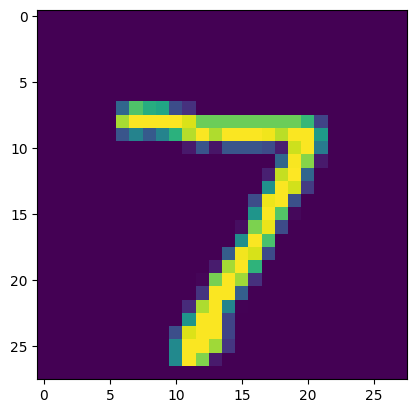

In [23]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[0]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f"Prediction: {prediction}")
image = data.squeeze(0).squeeze(0).numpy()

plt.imshow(image);

### Correctly Predicting Number 2

Prediction: 2


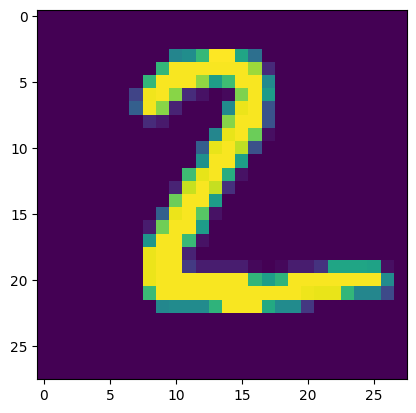

In [24]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[1]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f"Prediction: {prediction}")
image = data.squeeze(0).squeeze(0).numpy()

plt.imshow(image);

### Correctly Predicting Number 1

Prediction: 1


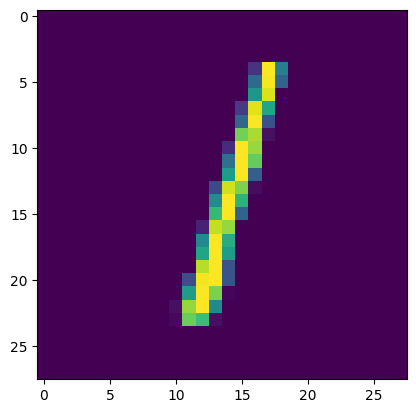

In [25]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[2]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f"Prediction: {prediction}")
image = data.squeeze(0).squeeze(0).numpy()

plt.imshow(image);

### Correctly Predicting Number 0

Prediction: 0


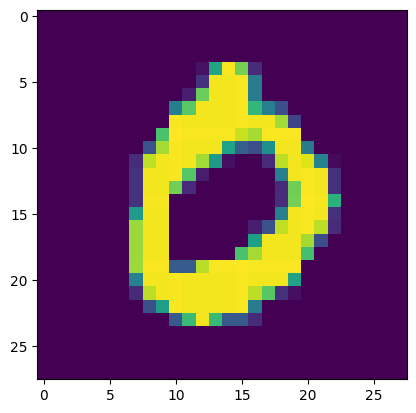

In [29]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[3]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f"Prediction: {prediction}")
image = data.squeeze(0).squeeze(0).numpy()

plt.imshow(image);

### Correctly Predicting Number 4

Prediction: 4


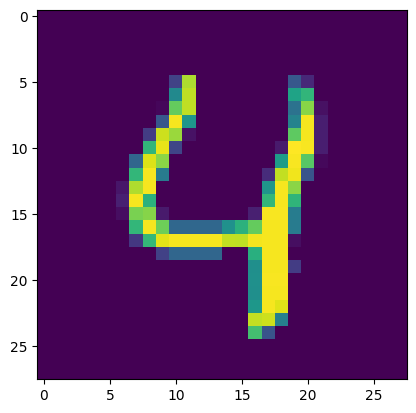

In [28]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[4]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f"Prediction: {prediction}")
image = data.squeeze(0).squeeze(0).numpy()

plt.imshow(image);

### Correctly predicting Number 5

Prediction: 5


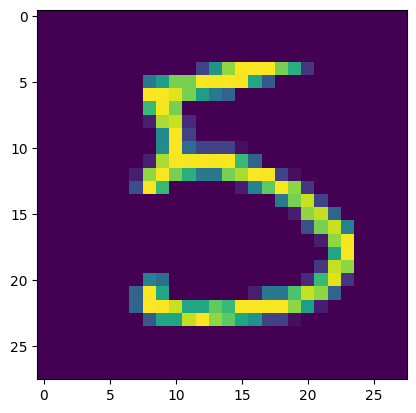

In [40]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[15]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f"Prediction: {prediction}")
image = data.squeeze(0).squeeze(0).numpy()

plt.imshow(image);